In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, pi
from IPython.display import HTML, clear_output
import time

In [2]:
matplotlib.rcParams['animation.html'] = 'jshtml'

https://www.a1k0n.net/2011/07/20/donut-math.html

In [3]:
def Torus(R1, R2, A, B, phi, theta):
    X = (R2 + R1*cos(theta)) * (cos(B)*cos(phi) + sin(A)*sin(B)*sin(phi)) - (R1*cos(A)*sin(B)*sin(theta))
    Y = (R2 + R1*cos(theta)) * (cos(phi)*sin(B) - cos(B)*sin(A)*sin(phi)) + (R1*cos(A)*cos(B)*sin(theta))
    Z = cos(A)*(R2 + R1*cos(theta))*sin(phi) + R1*sin(A)*sin(theta)
    return X, Y, Z

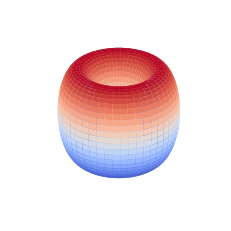

In [4]:
%matplotlib inline

R1, R2 = 1, 2
A, B = pi/2, 0
N = 50

phi = np.linspace(0, 2*pi, N)
theta = np.linspace(0, 2*pi, N)
torus = np.zeros((3, N, N))
for i in range(N):
    for j in range(N):
        torus[:,i,j] = Torus(R1, R2, A, B, phi[i], theta[j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_wireframe(torus[0], torus[1], torus[2], color='k')
ax.plot_surface(torus[0], torus[1], torus[2], cmap='coolwarm')
plt.axis('off')
plt.show()

In [5]:
N = 50
frames = 30

R1, R2 = 1, 2
A, B = pi/2, 0
dA, dB = pi/8, pi/16
phi = np.linspace(0, 2*pi, N)
theta = np.linspace(0, 2*pi, N)

def update(f):
    torus = np.zeros((3, N, N))
    colors = np.empty((N, N), dtype=str)
    colortuple = ('w', 'c')
    for i in range(N):
        for j in range(N):
            torus[:,i,j] = Torus(R1, R2, A=dA*f, B=dA*f, phi=phi[i], theta=theta[j])
            colors[i, j] = colortuple[(i + j) % len(colortuple)]
    plt.cla()
    ax.plot_surface(torus[0], torus[1], torus[2], facecolors=colors)
    # ax.plot_wireframe(torus[0], torus[1], torus[2])
    ax.set(xlim=(-np.max([R1,R2]), np.max([R1,R2])), 
           ylim=(-np.max([R1,R2]), np.max([R1,R2])), 
           zlim=(-np.max([R1,R2]), np.max([R1,R2])))
    plt.axis('off')

%matplotlib agg 
%matplotlib agg
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
torus_ani = animation.FuncAnimation(fig, update, frames, interval=120)
torus_ani

In [6]:
def Luminance(A, B, phi, theta):
    ## direction = [0, 1, -1]
    L = cos(phi)*cos(theta)*sin(B) - cos(A)*cos(theta)*sin(phi) \
        - sin(A)*sin(theta) + cos(B)*(cos(A)*sin(theta) - cos(theta)*sin(A)*sin(phi))
    return L

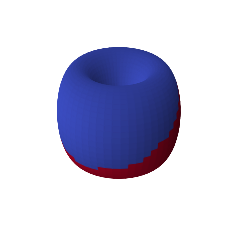

In [7]:
%matplotlib inline

R1, R2 = 1, 2
A, B = pi/2, 0
N = 50

phi = np.linspace(0, 2*pi, N)
theta = np.linspace(0, 2*pi, N)
torus = np.zeros((3, N, N))

colors = np.empty((N, N))
for i in range(N):
    for j in range(N):
        torus[:,i,j] = Torus(R1, R2, A, B, phi[i], theta[j])
        L = Luminance(A, B, phi[i], theta[j]) * 360  # sqrt(2) * 255
        colors[i, j] = int(L)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(torus[0], torus[1], torus[2], facecolors=plt.cm.coolwarm(colors))
plt.axis('off')
plt.show()

In [8]:
R1, R2 = 1, 2
A, B = pi/2, 0
N = 50

phi = np.linspace(0, 2*pi, N)
theta = np.linspace(0, 2*pi, N)

width, height = 50, 30
K2 = 5
K1 = 20
# K1 = width * K2 * 3 / (8 * (R1 + R2))

zbuff = np.zeros((width, height))
output = np.full((width, height), ' ', dtype=str)

torus = np.zeros((3, N, N))
for i in range(N):
    for j in range(N):
        torus[:,i,j] = Torus(R1, R2, A, B, phi[i], theta[j])
        inv_z = 1 / (torus[2,i,j] + K2)
        L = Luminance(A, B, phi[i], theta[j])
    
        xp = int(width/2 + K1*inv_z*torus[0,i,j])
        yp = int(height/2 - K1*inv_z*torus[1,i,j])
        if L > 0:
            if inv_z > zbuff[xp,yp]:
                zbuff[xp,yp] = inv_z
                lum_index = int(L*8)
                output[xp,yp] = ".,-~:;=!*#$@"[lum_index]
                
for i in range(height):
    char_out = ''
    for j in range(width):
        char_out += output[j,i]
    print(char_out)

                                                  
                                                  
                      @$ $@@@                     
                   $$ ## ## $$$                   
                 $ #=###***-## $                  
                # #~*** !!!* **;#                 
               ###**!! =====!!**###               
               ##**!=;::~~~::=!**###              
              #*** =;~---,--~;=! *#**             
             ****!=:~-,   .,-:; ! **              
            = **!==:-.      ,~:;=****             
            ;*** !;:,.       -:;=!* !!            
            !**!!=;~,        -~;=!***             
               *!=;:-        ,~;=!!*!!            
            !!*!!==:~        -:;=!!!!=            
            =!!*!!=;:-      .~;=!!!!!=            
               !**!!=:      :==!***!!=            
            ;!!******!;    =!*!***!!=             
            .=!! **####**!**##****! ;:            
            - =!**###$$$$$$$$##

In [9]:
def text_plot(A, B):
    R1, R2 = 1.5, 3
    # A, B = pi/2, 0
    N = 100

    phi = np.linspace(0, 2*pi, N)
    theta = np.linspace(0, 2*pi, N)

    width, height = 90, 45
    K2 = 10
    K1 = 30
    # K1 = width * K2 * 3 / (8 * (R1 + R2))

    zbuff = np.zeros((width, height))
    output = np.full((width, height), ' ', dtype=str)

    torus = np.zeros((3, N, N))
    for i in range(N):
        for j in range(N):
            torus[:,i,j] = Torus(R1, R2, A, B, phi[i], theta[j])
            inv_z = 1 / (torus[2,i,j] + K2)
            L = Luminance(A, B, phi[i], theta[j])

            xp = int(width/2 + K1*inv_z*torus[0,i,j])
            yp = int(height/2 - K1*inv_z*torus[1,i,j])
            if L > 0:
                if inv_z > zbuff[xp,yp]:
                    zbuff[xp,yp] = inv_z
                    lum_index = int(L*8)
                    output[xp,yp] = ".,-~:;=!*#$@"[lum_index]

    for i in range(height):
        char_out = ''
        for j in range(width):
            char_out += output[j,i]
        print(char_out)

In [12]:
dA, dB = pi/10, pi/16
frames = 100
for f in range(frames):
    clear_output(wait=True)
    text_plot(dA*f, dB*f)